# Look-alike Analysis

Find and target look-alike customers to increasing feature adoption and measure its impact on customer satisfaction

### Business Question 

I am a data scientist for a tech company. Our product team has launched a new feature that is currently used by a small number of customers. Our customers are small business owners. We are looking to increase the adoption of the feature by more customers. Below are some of the questions I need to solve through my analysis: 

1. Find the look-alike customers within our customer base that are currently not using this feature but could be targeted through our marketing 
2. Find out if adoption of new feature increases customer satisfaction (by comparing at customer satisfaction score for those that adopted vs those that didn't adopt). This could be used by product team as a measure of impact of the feature or could be used by marketing to place marketing claims to promote the feature
3. Describe what attributes or product features drive higher adoption of new features. This will inform future product development roadmap as suggest the profile of customers likely to adopt new features. 


## Performing Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
# Import Data 
data = pd.read_csv('data/simulated_product_usage_data.csv') 

### 1. Study basic structure of data 

In [7]:
data.head()

,customer_id,tenure_months,plan_type,satisfaction_score,uses_new_feature,login_frequency_per_week,last_login_date,reporting_tool_usage,collaboration_tool_usage,exports_per_week,automation_usage_hours,integration_api_calls,business_age_years,industry,location_type
0,1,39,Free,6.651457,0,3,2025-05-13 01:54:59.059745,2.753050,3.392367,0,0.277790,2.783968,45,Finance,Urban
1,2,52,Enterprise,7.645869,0,2,2025-06-04 01:54:59.059768,0.741196,6.304994,2,1.455927,3.320543,6,Healthcare,Urban
2,3,29,Pro,5.534764,0,3,2025-05-28 01:54:59.059771,4.267778,3.318902,2,1.272533,7.030386,31,Healthcare,Urban
3,4,15,Enterprise,7.289335,0,3,2025-05-13 01:54:59.059773,2.627996,4.228038,0,0.108264,6.784734,10,Retail,Urban
4,5,43,Enterprise,6.038569,0,1,2025-05-21 01:54:59.059790,0.607891,2.902324,1,0.644627,3.324688,14,Retail,Urban


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               20000 non-null  int64  
 1   tenure_months             20000 non-null  int64  
 2   plan_type                 20000 non-null  object 
 3   satisfaction_score        20000 non-null  float64
 4   uses_new_feature          20000 non-null  int64  
 5   login_frequency_per_week  20000 non-null  int64  
 6   last_login_date           20000 non-null  object 
 7   reporting_tool_usage      20000 non-null  float64
 8   collaboration_tool_usage  20000 non-null  float64
 9   exports_per_week          20000 non-null  int64  
 10  automation_usage_hours    20000 non-null  float64
 11  integration_api_calls     20000 non-null  float64
 12  business_age_years        20000 non-null  int64  
 13  industry                  20000 non-null  object 
 14  locati

In [9]:
# Check for missing values 
data.isnull().sum() 

customer_id                 0
tenure_months               0
plan_type                   0
satisfaction_score          0
uses_new_feature            0
login_frequency_per_week    0
last_login_date             0
reporting_tool_usage        0
collaboration_tool_usage    0
exports_per_week            0
automation_usage_hours      0
integration_api_calls       0
business_age_years          0
industry                    0
location_type               0
dtype: int64

**Observation:** There are no missing values in the data 

******

### 2. Study the variables 

**Variable - tenure_months**

In [14]:
# Describe tenure_months
data['tenure_months'].describe()

count    20000.000000
mean        30.092550
std         17.015321
min          1.000000
25%         16.000000
50%         30.000000
75%         45.000000
max         59.000000
Name: tenure_months, dtype: float64

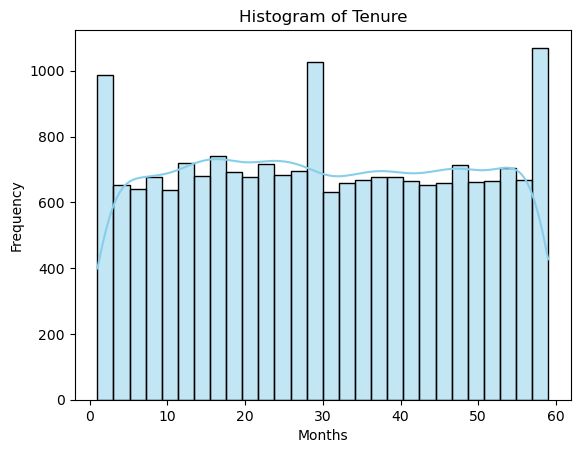

In [15]:
# Plot histogram of tenure_months 
sns.histplot(data['tenure_months'], kde=True, color='skyblue')
plt.title('Histogram of Tenure')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show() 

**Observation:** Customer's tenure with the product is between 1 to 60 months and is very evenly distributed with median and mean being 30 months

**Variable - plan_type**

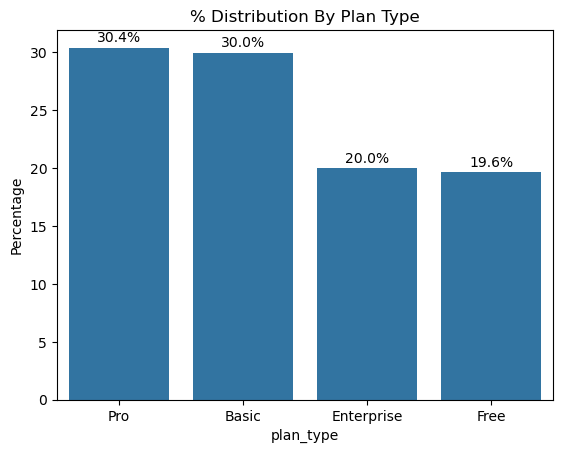

In [18]:
# Plotting distribution on plan_type 

percentages = data['plan_type'].value_counts(normalize=True) * 100

ax = sns.barplot(x=percentages.index, y=percentages.values)
plt.ylabel('Percentage')
plt.title('% Distribution By Plan Type')

for i, v in enumerate(percentages.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    
plt.show()

**Observation:** Basic and Pro are most favored plan types by customers with 30% adoption each, followed by Enterprise and Free types with 20% adoption each 

**Variable - satisfaction_score**

In [21]:
# Describe satisfaction_score 
data['satisfaction_score'].describe()

count    20000.000000
mean         6.983804
std          1.471285
min          1.000000
25%          5.967057
50%          7.002576
75%          8.020248
max         10.000000
Name: satisfaction_score, dtype: float64

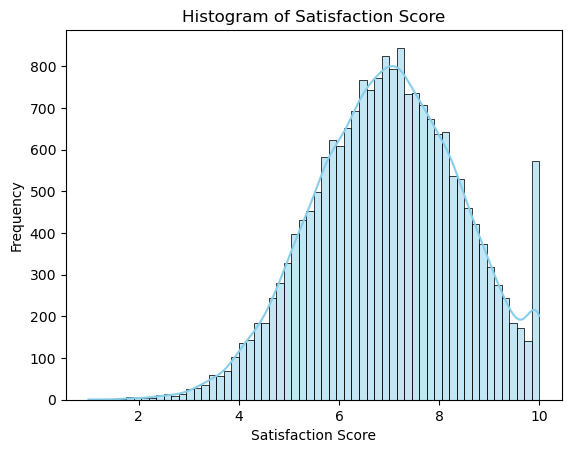

In [22]:
# Plot histogram of satisfaction_score
sns.histplot(data['satisfaction_score'], kde=True, color='skyblue')
plt.title('Histogram of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show() 

**Observation:** Satisfaction score is normally distributed with mean of 7

**Variable - uses_new_feature**

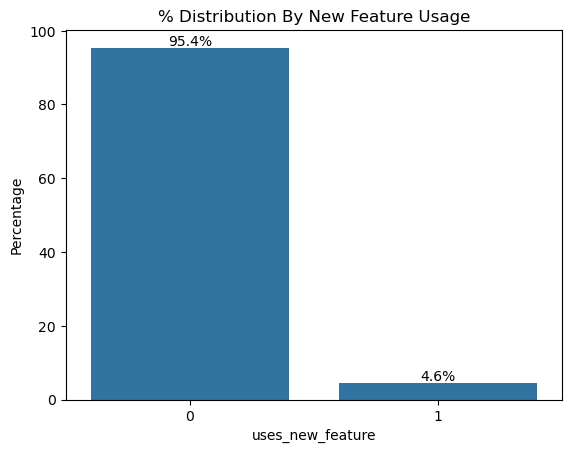

In [25]:
# Plotting distribution of new feature usage  

percentages = data['uses_new_feature'].value_counts(normalize=True) * 100

ax = sns.barplot(x=percentages.index, y=percentages.values)
plt.ylabel('Percentage')
plt.title('% Distribution By New Feature Usage')

for i, v in enumerate(percentages.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    
plt.show()

**Observation:** New feature has been adopted by 4.6% customers 

**Variable - login_frequency_per_week**

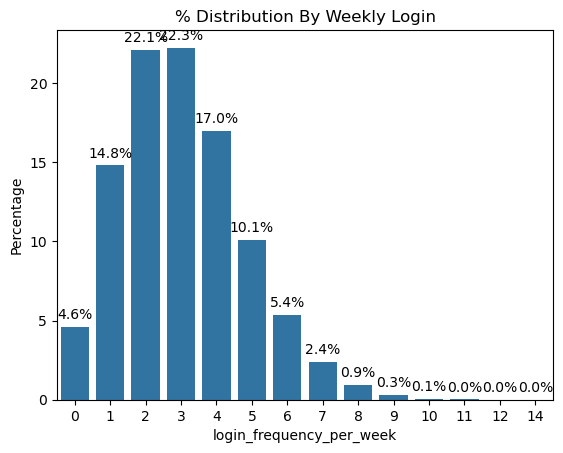

In [28]:
# Plotting distribution of login_frequency_per_week
percentages = data['login_frequency_per_week'].value_counts(normalize=True) * 100 
percent_dist_sorted = percentages.sort_index(ascending=True) 

ax = sns.barplot(x=percent_dist_sorted.index, y=percent_dist_sorted.values)
plt.ylabel('Percentage')
plt.title('% Distribution By Weekly Login')

for i, v in enumerate(percent_dist_sorted.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    
plt.show()

**Observation:** Frequency of logins is normally distributed with a median of 3 logins per week 

**Variable - last_login_date**

In [31]:
# In order to convert to a numeric column, create a new column based on last_login_date to show the days since last login 
data['days_since_last_login'] = (pd.Timestamp.today().normalize() - pd.to_datetime(data['last_login_date'])).dt.days 

In [32]:
# Describe satisfaction_score 
data['days_since_last_login'].describe()

count    20000.00000
mean        49.47700
std          8.69017
min         35.00000
25%         42.00000
50%         49.00000
75%         57.00000
max         64.00000
Name: days_since_last_login, dtype: float64

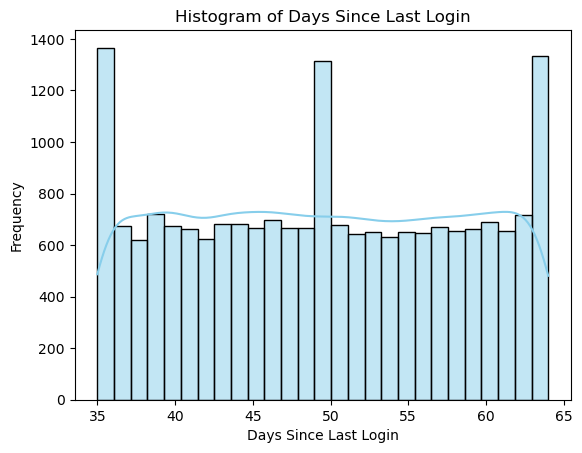

In [33]:
# Plot histogram of satisfaction_score
sns.histplot(data['days_since_last_login'], kde=True, color='skyblue')
plt.title('Histogram of Days Since Last Login')
plt.xlabel('Days Since Last Login')
plt.ylabel('Frequency')
plt.show() 

**Observation:** Days since login is uniformly distributed 

**Variable - reporting_tool_usage** 

In [36]:
# Describe reporting tool usage 
data['reporting_tool_usage'].describe()

count    20000.000000
mean         2.888979
std          1.612434
min          0.022048
25%          1.637726
50%          2.675591
75%          3.925219
max          9.440730
Name: reporting_tool_usage, dtype: float64

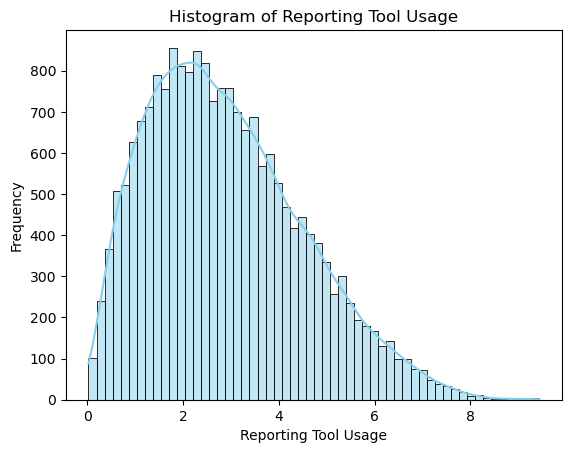

In [37]:
# Plot histogram of reporting tool usage 
sns.histplot(data['reporting_tool_usage'], kde=True, color='skyblue')
plt.title('Histogram of Reporting Tool Usage')
plt.xlabel('Reporting Tool Usage')
plt.ylabel('Frequency')
plt.show() 

**Observation:** Reporting tool usage is scaled from 0 to 10 depending on usage. The usaage is normally distributed with a mean usage of 2.89

**Variable - collaboration_tool_usage**

In [40]:
# Describe collaboration tool usage  
data['collaboration_tool_usage'].describe()

count    20000.000000
mean         4.074470
std          2.024330
min          0.000000
25%          2.488127
50%          3.931948
75%          5.535855
max         10.000000
Name: collaboration_tool_usage, dtype: float64

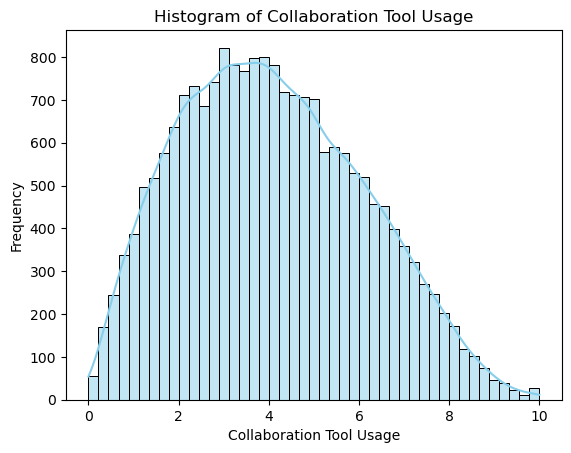

In [41]:
# Plot histogram of satisfaction_score
sns.histplot(data['collaboration_tool_usage'], kde=True, color='skyblue')
plt.title('Histogram of Collaboration Tool Usage')
plt.xlabel('Collaboration Tool Usage')
plt.ylabel('Frequency')
plt.show() 

**Observation:** Collaboration tool usage is scaled from 0 to 10 depending on usage. The usaage is normally distributed with a mean usage of 4.07

**Variable - exports_per_week**

In [44]:
# Describe exports_per_week  
data['exports_per_week'].describe()

count    20000.000000
mean         1.036800
std          1.045514
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: exports_per_week, dtype: float64

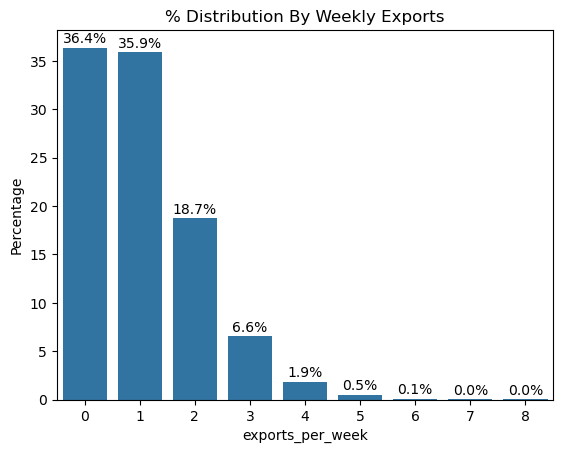

In [45]:
# Plotting distribution of exports_per_week
percentages = data['exports_per_week'].value_counts(normalize=True) * 100 
percent_dist_sorted = percentages.sort_index(ascending=True) 

ax = sns.barplot(x=percent_dist_sorted.index, y=percent_dist_sorted.values)
plt.ylabel('Percentage')
plt.title('% Distribution By Weekly Exports')

for i, v in enumerate(percent_dist_sorted.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    
plt.show()

**Observation:** Most customers either don't export reports weekly or export it once a week 

**Variable - automation_usage_hours**

In [48]:
# Describe automation_usage_hours
data['automation_usage_hours'].describe()

count    20000.000000
mean         1.528192
std          1.519120
min          0.000214
25%          0.449778
50%          1.070192
75%          2.114976
max         16.565672
Name: automation_usage_hours, dtype: float64

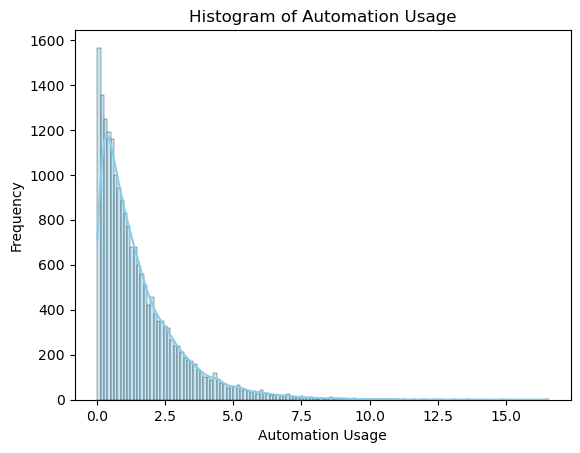

In [49]:
# Plot histogram of automation_usage_hours
sns.histplot(data['automation_usage_hours'], kde=True, color='skyblue')
plt.title('Histogram of Automation Usage')
plt.xlabel('Automation Usage')
plt.ylabel('Frequency')
plt.show() 

**Observation:** Automation feature has limited usage with median usage being 1 

**Variable - integration_api_calls**

In [52]:
# Describe integration_api_calls
data['integration_api_calls'].describe()

count    20000.000000
mean         4.323551
std          1.788726
min          0.207451
25%          2.992921
50%          4.235530
75%          5.596853
max         10.000000
Name: integration_api_calls, dtype: float64

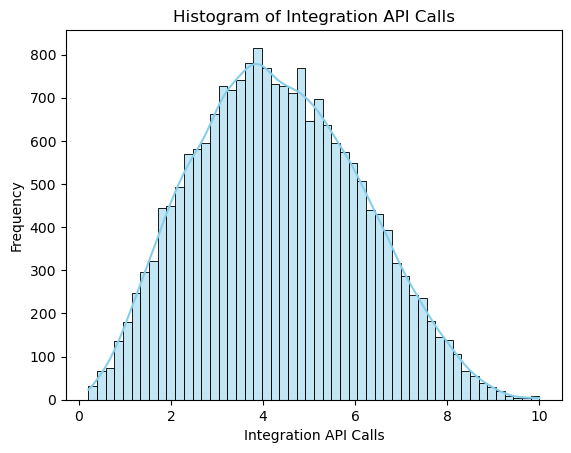

In [53]:
# Plot histogram of integration_api_calls
sns.histplot(data['integration_api_calls'], kde=True, color='skyblue')
plt.title('Histogram of Integration API Calls')
plt.xlabel('Integration API Calls')
plt.ylabel('Frequency')
plt.show() 

**Observation:** Most customers have made integration API calls with the feature usage averaging ~4 on a scale of 0-10 

**Variable - business_age_years**

In [56]:
# Describe business_age_years
data['business_age_years'].describe()

count    20000.000000
mean        24.946100
std         14.185114
min          1.000000
25%         13.000000
50%         25.000000
75%         37.000000
max         49.000000
Name: business_age_years, dtype: float64

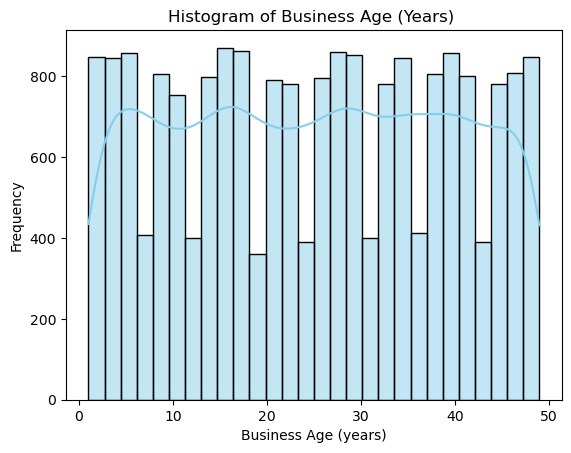

In [57]:
# Plot histogram of business_age_years
sns.histplot(data['business_age_years'], kde=True, color='skyblue')
plt.title('Histogram of Business Age (Years) ')
plt.xlabel('Business Age (years)')
plt.ylabel('Frequency')
plt.show() 

**Observation:** The business age for most businesses is uniformly distributed ranging from 1 year to 50 years and with an average of 25 years 

**Variable - industry**

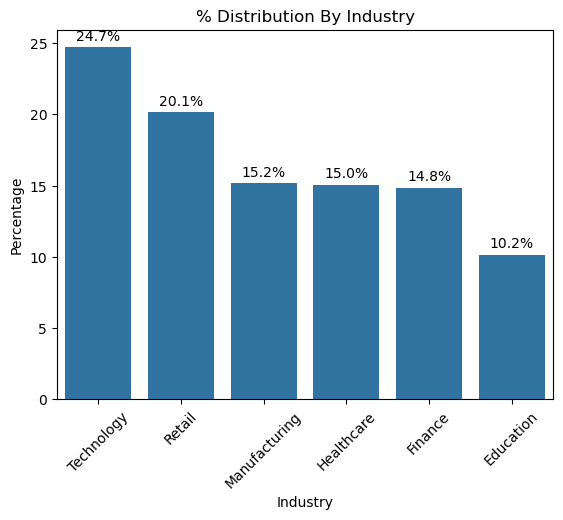

In [60]:
# Plotting distribution of industry

percentages = data['industry'].value_counts(normalize=True) * 100

ax = sns.barplot(x=percentages.index, y=percentages.values)
plt.xlabel('Industry')
plt.ylabel('Percentage')
plt.title('% Distribution By Industry')
plt.xticks(rotation=45)  
for i, v in enumerate(percentages.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    
plt.show()

**Observation:** Customers have highest representation from Technology industry (25%), followed by Retail (20%) 

**Variable - location_type**

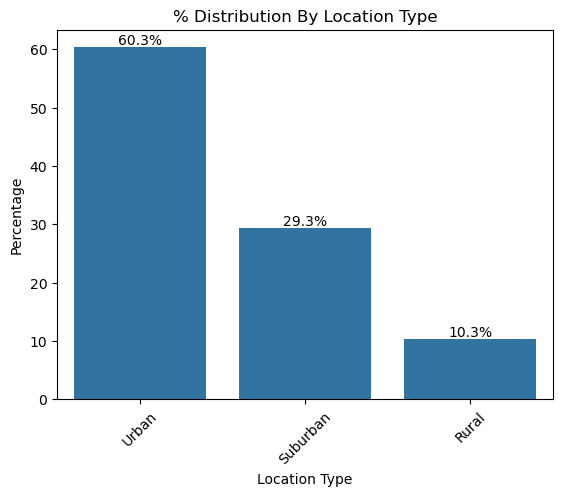

In [63]:
# Plotting distribution of location_type

percentages = data['location_type'].value_counts(normalize=True) * 100

ax = sns.barplot(x=percentages.index, y=percentages.values)
plt.xlabel('Location Type')
plt.ylabel('Percentage')
plt.title('% Distribution By Location Type')
plt.xticks(rotation=45)  
for i, v in enumerate(percentages.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    
plt.show()

**Observation:** There's a higher concentration of urban population in the customer base, followed by suburban and rural customers 

-------------

### 3. Comparing features for those that adopted new target feature vs those that haven't yet adopted the feature 

**Variable - tenure_months** 

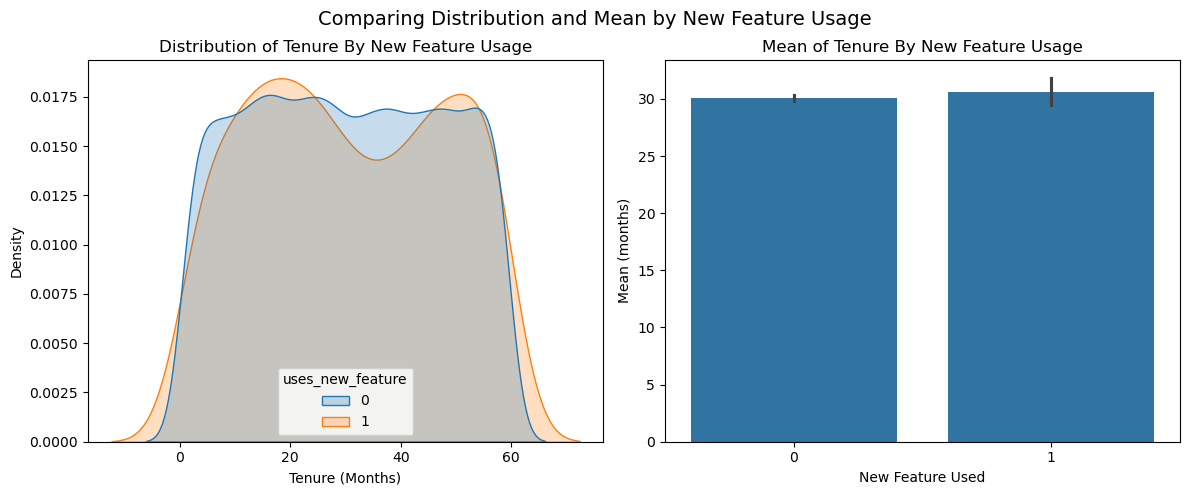

In [68]:
# Comparing tenures of those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for tenure_months by new feature usage 
sns.kdeplot(data=data, x='tenure_months', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Tenure By New Feature Usage')
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Density')

# Plot mean of tenure_months by new feature usage  
sns.barplot(x='uses_new_feature', y='tenure_months', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Tenure By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Mean (months)')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show() 

**Observation:** No significant difference between business tenure for customers who adopted the feature vs those that didn't adop the new feature. The distribution for both the groups remains uniform with similar means 

**Variable - satisfaction_score**

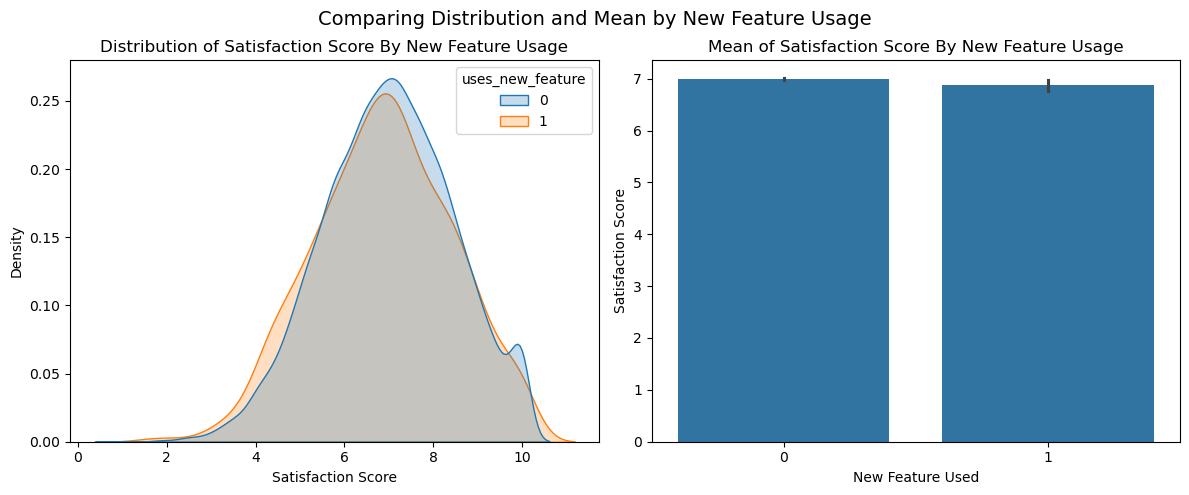

In [71]:
# Comparing tenures of those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for tenure_months by new feature usage 
sns.kdeplot(data=data, x='satisfaction_score', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Satisfaction Score By New Feature Usage')
axes[0].set_xlabel('Satisfaction Score')
axes[0].set_ylabel('Density')

# Plot mean of tenure_months by new feature usage  
sns.barplot(x='uses_new_feature', y='satisfaction_score', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Satisfaction Score By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Satisfaction Score')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show() 

**Observation:** No significant difference between satisfaction scores for customers who adopted the feature vs those that didn't adopt the new feature. The distribution for both the groups remains identical with similar means 

**Variable - login_frequency_per_week**

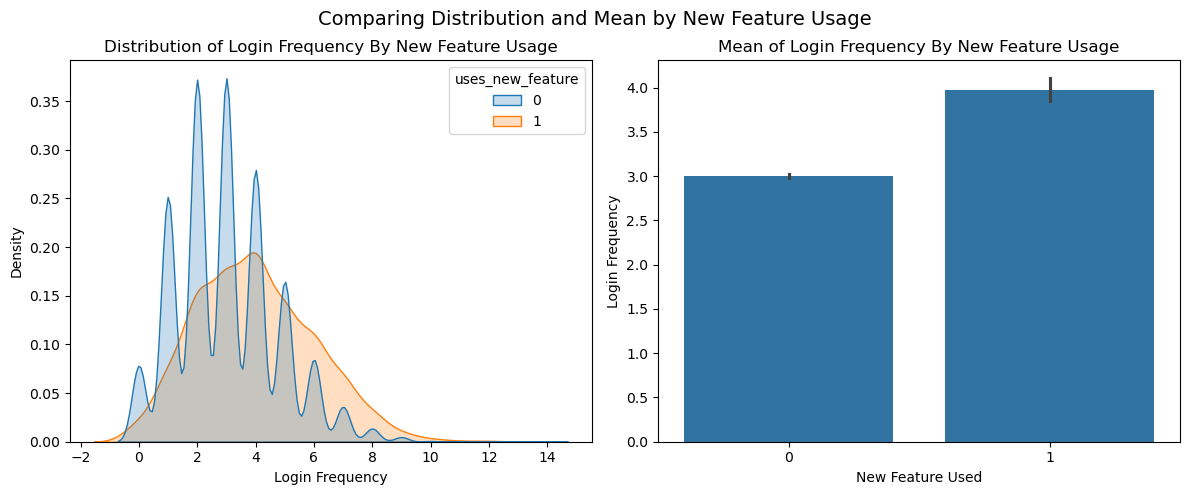

In [74]:
# Comparing login frequency of those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for login_frequency_per_week by new feature usage 
sns.kdeplot(data=data, x='login_frequency_per_week', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Login Frequency By New Feature Usage')
axes[0].set_xlabel('Login Frequency')
axes[0].set_ylabel('Density')

# Plot mean of tenure_months by new feature usage  
sns.barplot(x='uses_new_feature', y='login_frequency_per_week', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Login Frequency By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Login Frequency')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** Login frequency is a higher for those that used the new feature pointing to some correlation between product engagement and feature usage 

**Variable - last_login_date/days_since_last_login**

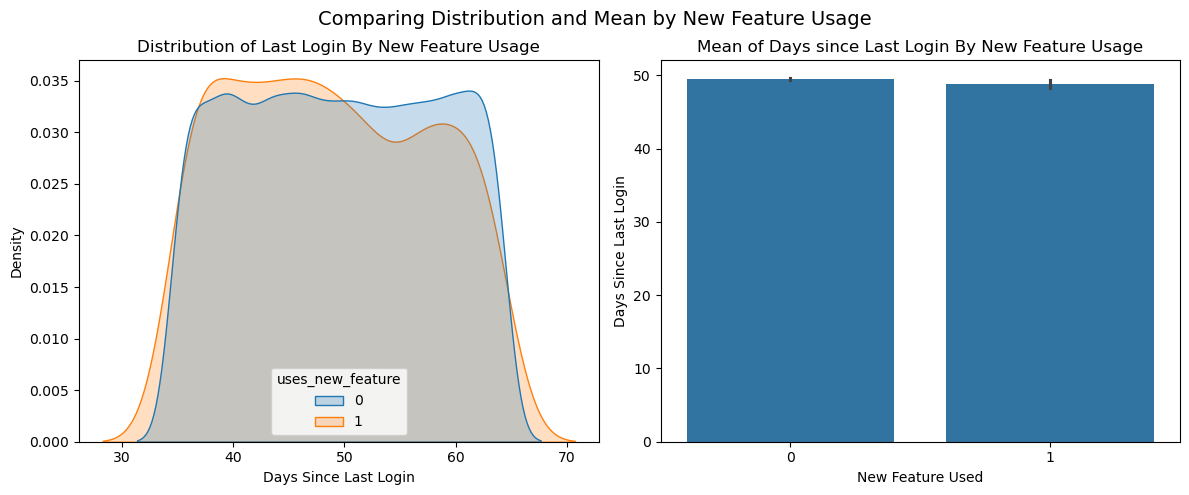

In [77]:
# Comparing days since last login of those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for login_frequency_per_week by new feature usage 
sns.kdeplot(data=data, x='days_since_last_login', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Last Login By New Feature Usage')
axes[0].set_xlabel('Days Since Last Login')
axes[0].set_ylabel('Density')

# Plot mean of days_since_last_login by new feature usage  
sns.barplot(x='uses_new_feature', y='days_since_last_login', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Days since Last Login By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Days Since Last Login')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** Not much difference in days since last login and new feature usage 

**Variable - reporting_tool_usage**

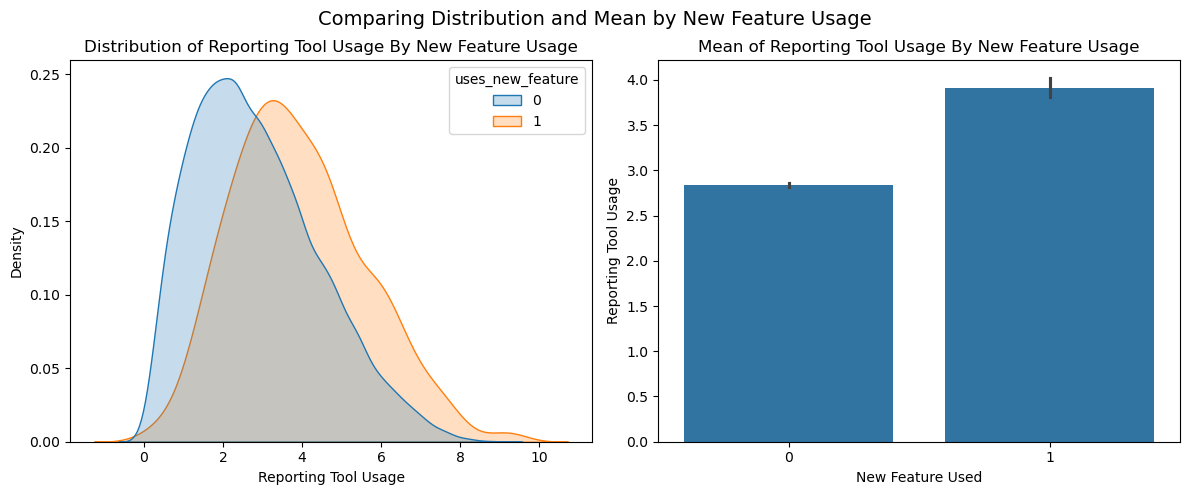

In [80]:
# Comparing reporting tool usage of those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for reporting_tool_usage by new feature usage 
sns.kdeplot(data=data, x='reporting_tool_usage', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Reporting Tool Usage By New Feature Usage')
axes[0].set_xlabel('Reporting Tool Usage')
axes[0].set_ylabel('Density')

# Plot mean of reporting_tool_usage by new feature usage  
sns.barplot(x='uses_new_feature', y='reporting_tool_usage', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Reporting Tool Usage By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Reporting Tool Usage')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** Reporting tool usage is higher for those that have used new feature vs those that have not tried the new feature 

**Variable - collaboration_tool_usage** 

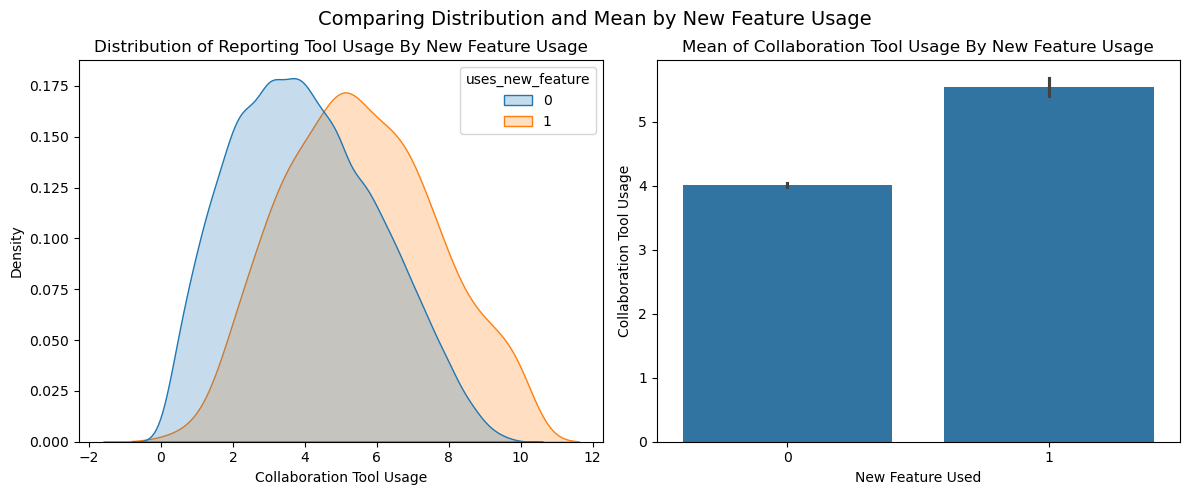

In [83]:
# Comparing collaboration tool usage of those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for collaboration_tool_usage by new feature usage 
sns.kdeplot(data=data, x='collaboration_tool_usage', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Reporting Tool Usage By New Feature Usage')
axes[0].set_xlabel('Collaboration Tool Usage')
axes[0].set_ylabel('Density')

# Plot mean of collaboration_tool_usage by new feature usage  
sns.barplot(x='uses_new_feature', y='collaboration_tool_usage', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Collaboration Tool Usage By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Collaboration Tool Usage')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** Collaboration tool usage is higher for those that have used new feature vs those that have not tried the new feature

**Variable - exports_per_week**

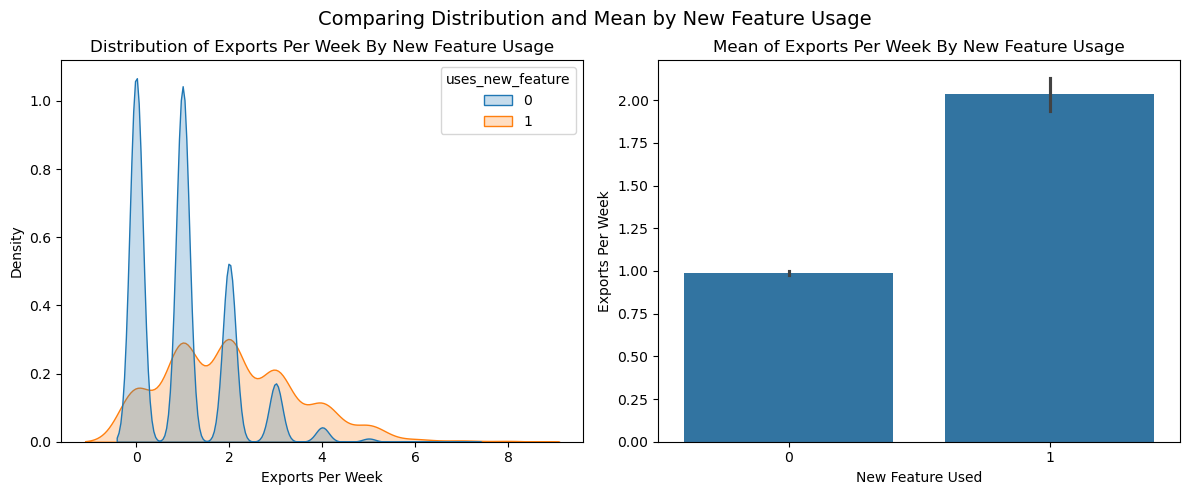

In [86]:
# Comparing exports_per_week for those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for exports_per_week by new feature usage 
sns.kdeplot(data=data, x='exports_per_week', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Exports Per Week By New Feature Usage')
axes[0].set_xlabel('Exports Per Week')
axes[0].set_ylabel('Density')

# Plot mean of exports_per_week by new feature usage  
sns.barplot(x='uses_new_feature', y='exports_per_week', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Exports Per Week By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Exports Per Week')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** Exports per week is higher for those that have used new feature vs those that have not tried the new feature

**Variable - automation_usage_hours**

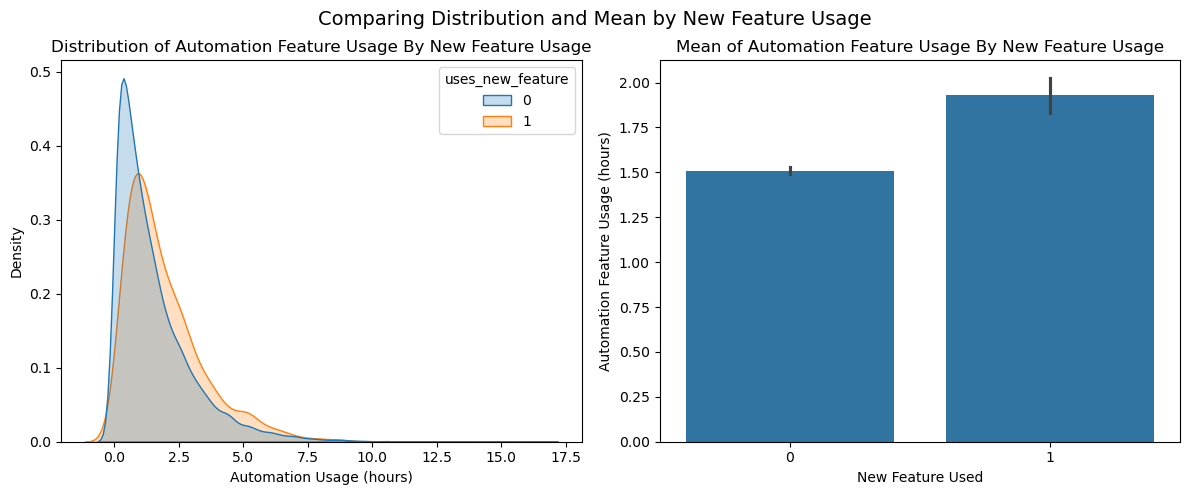

In [89]:
# Comparing automation_usage_hours for those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for automation_usage_hours by new feature usage 
sns.kdeplot(data=data, x='automation_usage_hours', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Automation Feature Usage By New Feature Usage')
axes[0].set_xlabel('Automation Usage (hours)')
axes[0].set_ylabel('Density')

# Plot mean of exports_per_week by new feature usage  
sns.barplot(x='uses_new_feature', y='automation_usage_hours', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Automation Feature Usage By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Automation Feature Usage (hours)')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** Automation feature usgae is higher for those that have used new feature vs those that have not tried the new feature

**Variable - integration_api_calls**

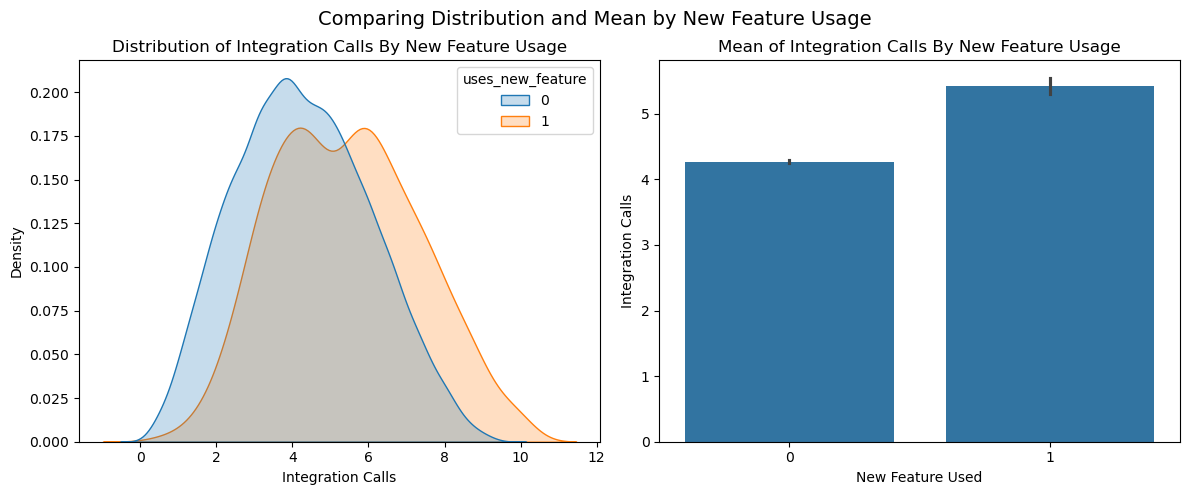

In [92]:
# Comparing integration_api_calls for those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for integration_api_calls by new feature usage 
sns.kdeplot(data=data, x='integration_api_calls', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Integration Calls By New Feature Usage')
axes[0].set_xlabel('Integration Calls')
axes[0].set_ylabel('Density')

# Plot mean of integration_api_calls by new feature usage  
sns.barplot(x='uses_new_feature', y='integration_api_calls', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Integration Calls By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Integration Calls')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** Integration calls are higher for those that have used new feature vs those that have not tried the new feature

**Variable - business_age_years**

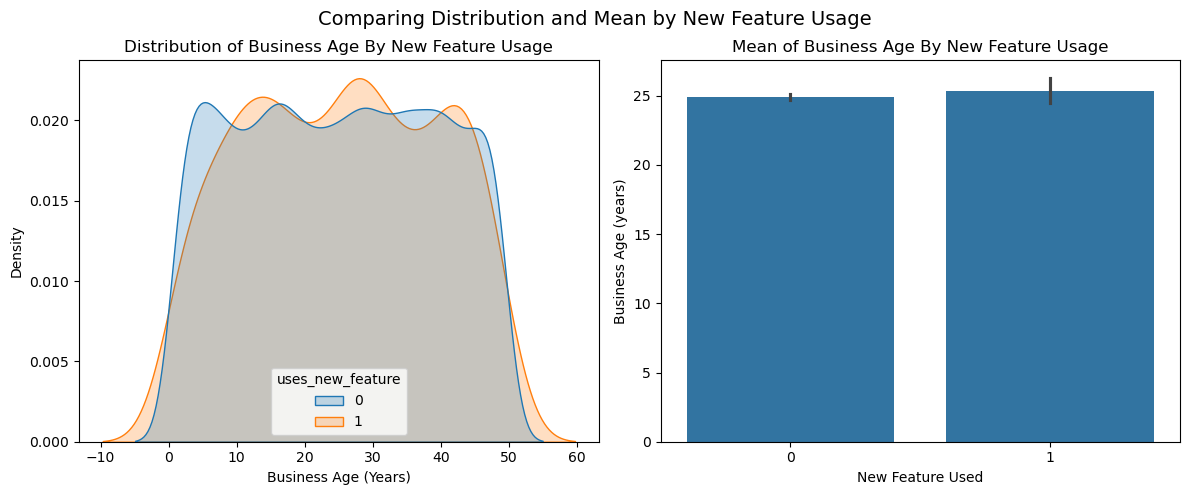

In [95]:
# Comparing business_age_years for those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KDE for business_age_years by new feature usage 
sns.kdeplot(data=data, x='business_age_years', hue='uses_new_feature', common_norm=False, fill=True, ax=axes[0])
axes[0].set_title('Distribution of Business Age By New Feature Usage')
axes[0].set_xlabel('Business Age (Years)')
axes[0].set_ylabel('Density')

# Plot mean of business_age_years by new feature usage  
sns.barplot(x='uses_new_feature', y='business_age_years', data=data, estimator=np.mean) 
axes[1].set_title('Mean of Business Age By New Feature Usage')
axes[1].set_xlabel('New Feature Used')
axes[1].set_ylabel('Business Age (years)')

# Overall figure title and layout
fig.suptitle('Comparing Distribution and Mean by New Feature Usage', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** Business Age is distribution and mean is similar for those have used the feature vs those that have not used the new feature 

**Variable - plan_type**

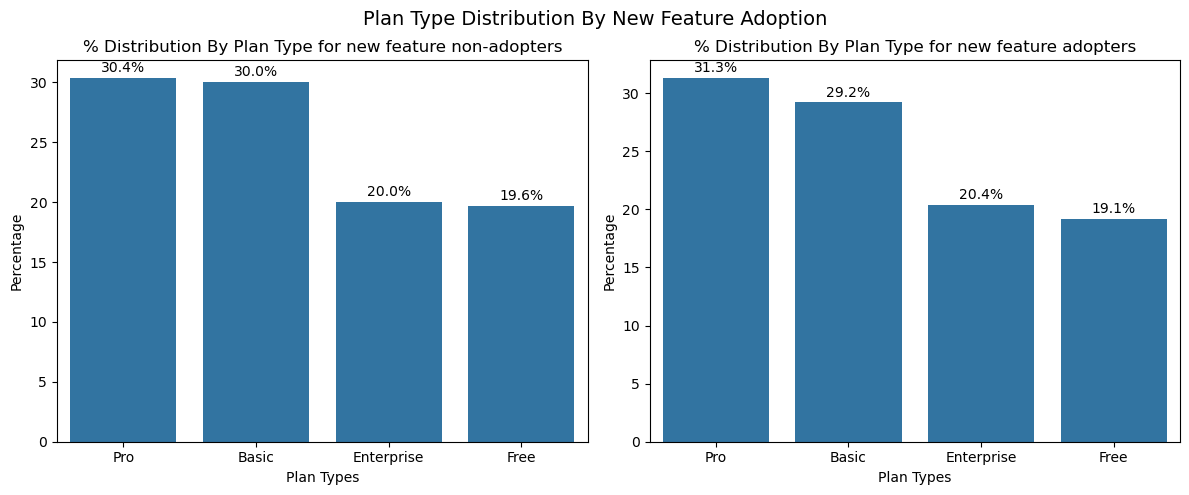

In [98]:
# Comparing plan_type for those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for plan_type for those who didn't used new feature 
percentages = data[data['uses_new_feature'] == False]['plan_type'].value_counts(normalize=True) * 100
sns.barplot(x=percentages.index, y=percentages.values, ax=axes[0]) 
axes[0].set_title('% Distribution By Plan Type for new feature non-adopters')
axes[0].set_xlabel('Plan Types')
axes[0].set_ylabel('Percentage')
for i, v in enumerate(percentages.values):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center') 

# Bar plot for plan_type for those used new feature 
percentages = data[data['uses_new_feature'] == True]['plan_type'].value_counts(normalize=True) * 100
sns.barplot(x=percentages.index, y=percentages.values, ax=axes[1]) 
axes[1].set_title('% Distribution By Plan Type for new feature adopters')
axes[1].set_xlabel('Plan Types')
axes[1].set_ylabel('Percentage')
for i, v in enumerate(percentages.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center') 

# Overall figure title and layout
fig.suptitle('Plan Type Distribution By New Feature Adoption', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


**Observation:** No significant difference in the distribution by plan type for those adopting/not adopting the new feature  

**Variable - industry**

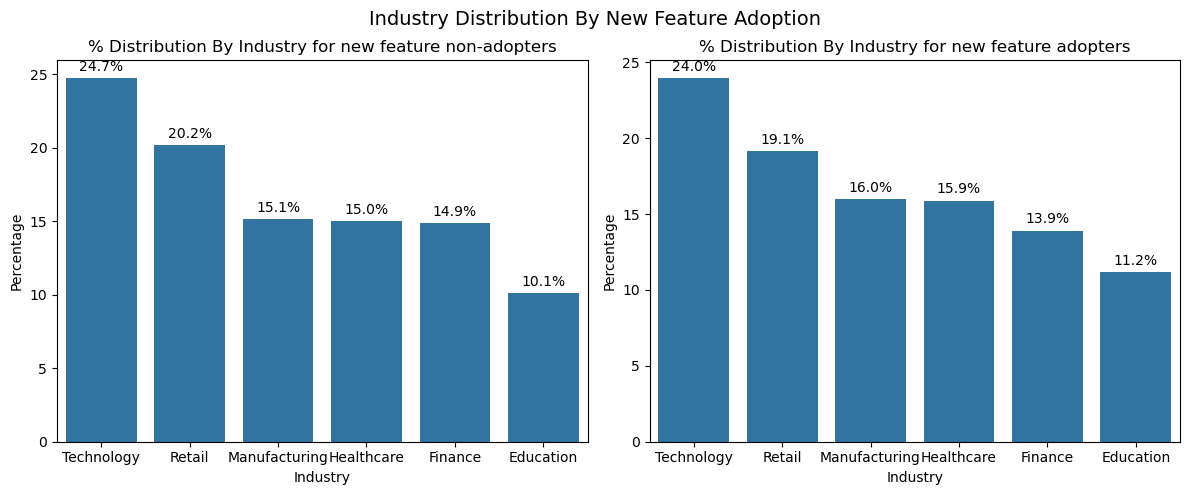

In [101]:
# Comparing industry for those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for industry for those who didn't used new feature 
percentages = data[data['uses_new_feature'] == False]['industry'].value_counts(normalize=True) * 100
sns.barplot(x=percentages.index, y=percentages.values, ax=axes[0]) 
axes[0].set_title('% Distribution By Industry for new feature non-adopters')
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Percentage')
for i, v in enumerate(percentages.values):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center') 

# Bar plot for industry for those used new feature 
percentages = data[data['uses_new_feature'] == True]['industry'].value_counts(normalize=True) * 100
sns.barplot(x=percentages.index, y=percentages.values, ax=axes[1]) 
axes[1].set_title('% Distribution By Industry for new feature adopters')
axes[1].set_xlabel('Industry')
axes[1].set_ylabel('Percentage')
for i, v in enumerate(percentages.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center') 

# Overall figure title and layout
fig.suptitle('Industry Distribution By New Feature Adoption', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** No significant difference in the distribution by industry for those adopting/not adopting the new feature

**Variable - location_type**

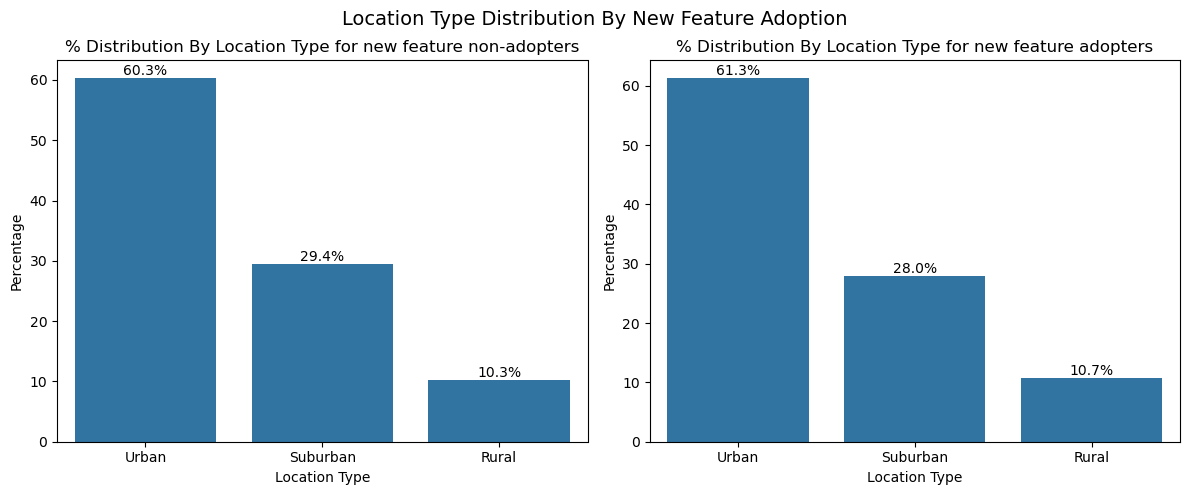

In [104]:
# Comparing location_type for those that used the new feature vs those that didn't use the feature 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for location_type for those who didn't used new feature 
percentages = data[data['uses_new_feature'] == False]['location_type'].value_counts(normalize=True) * 100
sns.barplot(x=percentages.index, y=percentages.values, ax=axes[0]) 
axes[0].set_title('% Distribution By Location Type for new feature non-adopters')
axes[0].set_xlabel('Location Type')
axes[0].set_ylabel('Percentage')
for i, v in enumerate(percentages.values):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center') 

# Bar plot for location_type for those used new feature 
percentages = data[data['uses_new_feature'] == True]['location_type'].value_counts(normalize=True) * 100
sns.barplot(x=percentages.index, y=percentages.values, ax=axes[1]) 
axes[1].set_title('% Distribution By Location Type for new feature adopters')
axes[1].set_xlabel('Location Type')
axes[1].set_ylabel('Percentage')
for i, v in enumerate(percentages.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center') 

# Overall figure title and layout
fig.suptitle('Location Type Distribution By New Feature Adoption', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**Observation:** No significant difference in the distribution by location type for those adopting/not adopting the new feature

---------

## Data Preprocessing - Lookalike Analysis

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.dummy import DummyClassifier 
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, SVC 
from sklearn.metrics import roc_auc_score, precision_score 
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier 
import warnings
from sklearn.exceptions import ConvergenceWarning


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               20000 non-null  int64  
 1   tenure_months             20000 non-null  int64  
 2   plan_type                 20000 non-null  object 
 3   satisfaction_score        20000 non-null  float64
 4   uses_new_feature          20000 non-null  int64  
 5   login_frequency_per_week  20000 non-null  int64  
 6   last_login_date           20000 non-null  object 
 7   reporting_tool_usage      20000 non-null  float64
 8   collaboration_tool_usage  20000 non-null  float64
 9   exports_per_week          20000 non-null  int64  
 10  automation_usage_hours    20000 non-null  float64
 11  integration_api_calls     20000 non-null  float64
 12  business_age_years        20000 non-null  int64  
 13  industry                  20000 non-null  object 
 14  locati

**Sampling data for modeling** 

I need to find look-alike for customers that have used the new feature i.e. lookalikes of 'uses_new_feature' = 1. In order to have a balanced class for alookalike modeling, I will take a sample of 'uses_new_feature' = 0 with same size as target group. I will score on the entire dataset with 'uses_new_feature' = 0 to find the look-alikes. 

In [111]:
# Define positive and negative groups
positive = data[data['uses_new_feature'] == 1]
negative = data[data['uses_new_feature'] == 0].sample(len(positive), random_state=42)

# Combine
lookalike_data = pd.concat([positive.assign(target=1), negative.assign(target=0)])

**Dropping following columns:**
1. customer_id - this is an unique customer identifier and hence not useful for modeling
2. satisfaction_score - this is dependent or target variable to when we study the impact of feature usage on customer satisfaction
3. uses_new_feature - this is a target variable for look-alike analysis
4. last_login_date - this independent variable is being translated to days_since_last_login 

In [113]:
# Prepare data for modeling and target array 
X = lookalike_data.drop(columns=['target','customer_id','satisfaction_score','uses_new_feature','last_login_date'])
y = lookalike_data['target']

In [114]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Column transformation:** 
1. Select and transform non-numeric columns using one-hot-encoder
2. Transform the remainder columns (numeric columns) using StandardScaler  

In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1371 entries, 8602 to 15548
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tenure_months             1371 non-null   int64  
 1   plan_type                 1371 non-null   object 
 2   login_frequency_per_week  1371 non-null   int64  
 3   reporting_tool_usage      1371 non-null   float64
 4   collaboration_tool_usage  1371 non-null   float64
 5   exports_per_week          1371 non-null   int64  
 6   automation_usage_hours    1371 non-null   float64
 7   integration_api_calls     1371 non-null   float64
 8   business_age_years        1371 non-null   int64  
 9   industry                  1371 non-null   object 
 10  location_type             1371 non-null   object 
 11  days_since_last_login     1371 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 139.2+ KB


In [117]:
# transform columns in preparation for modeling
selector = make_column_selector(dtype_include='object')
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), selector),      # One-hot encode categorical columns
    remainder = StandardScaler()    # Scale numeric columns 
    )

-------

## Building Baseline Models 

In [120]:
# Define baseline models and pipelines
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LGBM": LGBMClassifier(verbose=-1,random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42) 
}

In [121]:
# Fitting models 
results = {}

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    for name, model in models.items():
        pipe = Pipeline([('transformer',transformer),(name,model)])
        pipe.fit(X_train, y_train)
        y_pred_proba = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
        
        # Precision@Top-10% scoring
        top_k = int(0.1 * len(y_test))
        top_indices = np.argsort(y_pred_proba)[-top_k:]
        top_preds = np.zeros_like(y_test)
        top_preds[top_indices] = 1
        precision_at_k = precision_score(y_test, top_preds)
        results[name] = {"AUC": auc, "Precision@Top10%": precision_at_k}  

results_df = pd.DataFrame.from_dict(results, orient='index') 

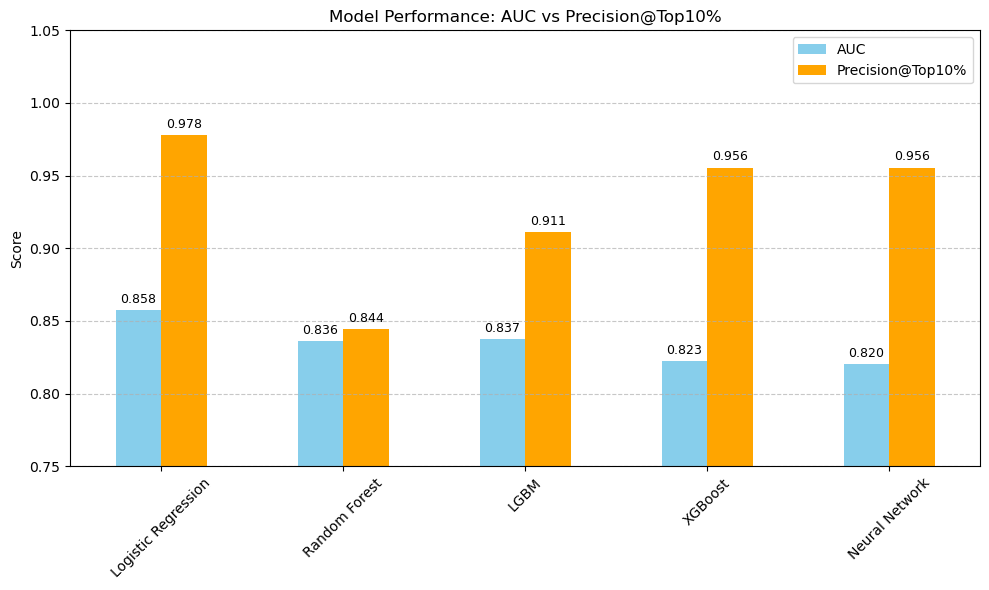

In [122]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = results_df.plot(kind='bar', ax=ax, color=['skyblue', 'orange'])

# Add labels
for bar_group in bars.containers:
    for bar in bar_group:
        height = bar.get_height()
        bars.annotate(f'{height:.3f}',
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),  # Offset
                      textcoords='offset points',
                      ha='center', va='bottom', fontsize=9)

# Final formatting
plt.title('Model Performance: AUC vs Precision@Top10%')
plt.ylabel('Score')
plt.ylim(0.75, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Observation:**

AUC is the best for Logistic Regression. AUC is also good for Ramdom Forest and LGBM, However, Precision for top 10% predictions is lower for Random Forest. To pick the best model from Logistic Regression, Random Forest and LGBM we'll now use GridSearchCV to find optimal parameters 

-----------

## Hyperparameter Tuning For Top Models 

In [126]:
# Build pipeline to test. Initiate with a dummy classifier 
pipe = Pipeline([
    ('transformer', transformer),
    ('classifier', DummyClassifier())
])

# Parameters to search 
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'liblinear']  
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__max_features': ['sqrt', 'log2']
    },
    {
        'classifier': [LGBMClassifier(verbose=-1,random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [-1, 10, 20],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__num_leaves': [31, 50],
        'classifier__min_child_samples': [20, 30]
    }
]

# Run GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x131fe11c0>)])),
                                       ('classifier', DummyClassifier())]),
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000)],
                          'classif...
                          'classifier__min_samples_leaf': [1, 2],
                          'classifier__min_samples_split': [2, 5],
                          'classifier__n_estimators': [100, 200]},
                         {'classifier': [LGBMClassifier(random_state=42,
                                                        verbose=-1)],
                          'classifier__learning_rate': [0.01, 0.1],
                          'classifier__max_depth': [-1, 10, 20],
                          'classifier__min_child_samples': [20, 30],
                          'classifier__n_estimators': [100, 200],
                          'classifier__num_leaves': [31, 50]}],
             scoring='accuracy')

In [127]:
# Best model and score
print("Best AUC:", grid.best_score_)
print("Best Params:", grid.best_params_)

# Use the best model
best_model = grid.best_estimator_ 
print("Best Model:", best_model)

Best AUC: 0.7797080291970803
Best Params: {'classifier': LogisticRegression(max_iter=1000), 'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Model: Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x136aaa570>)])),
                ('classifier',
                 LogisticRegression(C=0.01, max_iter=1000,
                                    solver='liblinear'))])


**Observation:** The best model, as determined through hyperparameter tuning is **LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')** 

-------

## Feature Importance (for the best model) 

In [131]:
# Get the preprocessor (ColumnTransformer)
preprocessor = best_model.named_steps['transformer']
X_transformed = preprocessor.transform(X_train)

# Get transformed feature names
feature_names = preprocessor.get_feature_names_out()

# Get fitted classifier
model = best_model.named_steps['classifier']

In [132]:
# Compute feature importance 
coef = model.coef_.flatten()
importance_df = pd.DataFrame({'feature': feature_names, 'coefficient': coef})
importance_df['abs_coef'] = importance_df['coefficient'].abs()
importance_df = importance_df.sort_values('abs_coef', ascending=False)

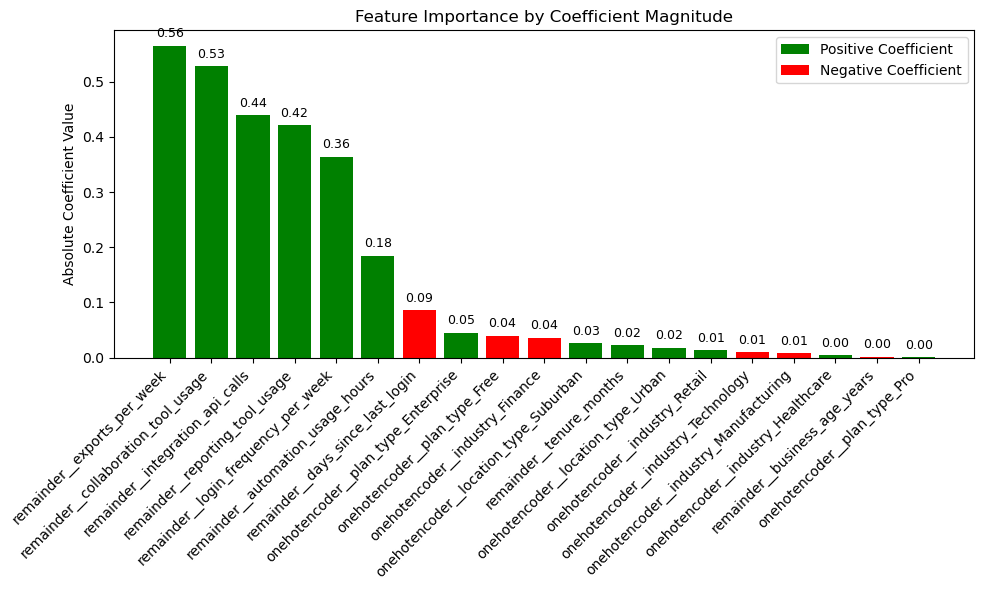

In [133]:
# Plot Feature Importance 

from matplotlib.patches import Patch

# Define colors based on sign of coefficient
importance_df['color'] = importance_df['coefficient'].apply(lambda x: 'green' if x > 0 else 'red')

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(importance_df['feature'], importance_df['abs_coef'], color=importance_df['color'])

# Add data labels
for bar, coef_val in zip(bars, importance_df['abs_coef']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,  
        f"{coef_val:.2f}",  
        ha='center',
        va='bottom',
        fontsize=9
    ) 

#Legend 
legend_elements = [
    Patch(facecolor='green', label='Positive Coefficient'),
    Patch(facecolor='red', label='Negative Coefficient')
]
plt.legend(handles=legend_elements) 

# Labels and layout
plt.xticks(rotation=45, ha='right')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance by Coefficient Magnitude')
plt.tight_layout()
plt.show() 

**Observation** 
The above feature importance indicates that customers with higher key feature engagement are more likely to adopt the new feature. The top 5 important features are: 
1. Higher exports per week, more likely will be new feature adoption
2. Higher collaboration tool usage, more likely will be new feature adoption
3. Higher integration API calls, more likely will be new feature adoption
4. Higher reporting tool usage, more likely will be new feature adoption
5. Higher login frequency per week, more likely will be new feature adoption


------

## Finding Lookalikes 

Score the entire dataset (that has not adopted new feature), using the best estimator, to find the lookalike for feature adopters 

In [138]:
# Scoring the dataset with 'uses_new_feature' = 0 
scoring_pool = data[data['uses_new_feature'] == 0]
X_score = scoring_pool.drop(columns=['customer_id','satisfaction_score','uses_new_feature','last_login_date']) 

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    scoring_pool['propensity_score'] = best_model.predict_proba(X_score)[:,1]
    top_lookalikes = scoring_pool.sort_values(by='propensity_score', ascending=False).head(int(len(scoring_pool) * 0.20))
    

In [139]:
print("Top lookalike customer count: ", len(top_lookalikes))

Top lookalike customer count:  3817


**Observation** We have identified 3.8K lookalike customers who could be targeted to promote the new feature 

---------

## Impact of new feature adoption on customer satisfaction using **Causal Inference Techniques** 

Creating Treatment group (used new feature) and matching Control group (not used feature) based on propensity scores for **Propensity Score Matching (PSM)**  

In [144]:
from sklearn.neighbors import NearestNeighbors

# Scoring the enitire data set and splitting into treatment and control 
propensity_scoring_pool = data.drop(columns=['customer_id','satisfaction_score','uses_new_feature','last_login_date']) 
data['propensity_score'] = best_model.predict_proba(propensity_scoring_pool)[:,1]

treatment = data[data['uses_new_feature'] == 1]
control = data[data['uses_new_feature'] == 0]

# Fit NearestNeighbors on control group scores
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])

# Find nearest control match for each treatmeant unit
distances, indices = nn.kneighbors(treatment[['propensity_score']])

matched_control = control.iloc[indices.flatten()].reset_index(drop=True)
matched_treatment = treatment.reset_index(drop=True)


In [145]:
# Comparing Satisfaction Scores of Treatment and matching Control groups 
effect = matched_treatment['satisfaction_score'].mean() - matched_control['satisfaction_score'].mean()
print(effect)

-0.12640144546964827


**Observation:** Satisfaction score for those that used the new feature is not higher than comparable customers that didn't use the new feature. 

In other words, **adoption of new feature didn't have any significant impact on customer satisfaction**. 